In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
df = pd.read_csv(
    "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
)
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# Problem Statement

##The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? 

In [159]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [160]:
df.describe(include="all")


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [161]:
df.skew()


C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_7084\547062910.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


User_ID             0.003066
Occupation          0.400140
Marital_Status      0.367437
Product_Category    1.025735
Purchase            0.600140
dtype: float64

In [162]:
def missing_value(df):
    null_values=df.isnull().sum()
    percent=df.isnull().sum()/df.isnull().count()*100
    actual_missing_values=pd.concat([null_values,percent],axis=1,keys=['value','Percentage'])
    print(actual_missing_values)
    
missing_value(df)



                            value  Percentage
User_ID                         0         0.0
Product_ID                      0         0.0
Gender                          0         0.0
Age                             0         0.0
Occupation                      0         0.0
City_Category                   0         0.0
Stay_In_Current_City_Years      0         0.0
Marital_Status                  0         0.0
Product_Category                0         0.0
Purchase                        0         0.0


#There are no missing values or Null values in the Dataset

In [163]:
top_products=df['Product_ID'].value_counts().index[:10]
top_products

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00057642',
       'P00184942', 'P00046742', 'P00058042', 'P00059442', 'P00145042'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x2543ef6ee90>,
 [Text(-0.785367774085001, 0.7701931312526561, 'Male'),
  Text(0.7853677019743126, -0.7701932047840901, 'Female')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.31'),
  Text(0.42838238289507957, -0.42010538442768547, '24.69')])

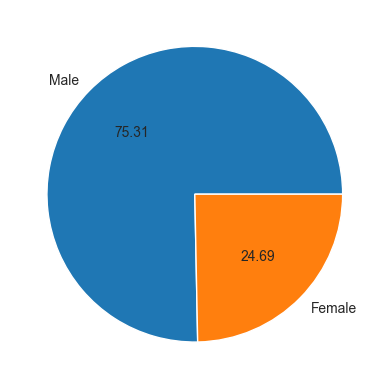

In [164]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct="%.2f")

#The Male customers have done a lot of purchase than Female Customers

In [165]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_7084\2716215384.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_7084\2716215384.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)
C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_7084\2716215384.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)
C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_7084\2716215384.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax

<Figure size 2000x800 with 0 Axes>

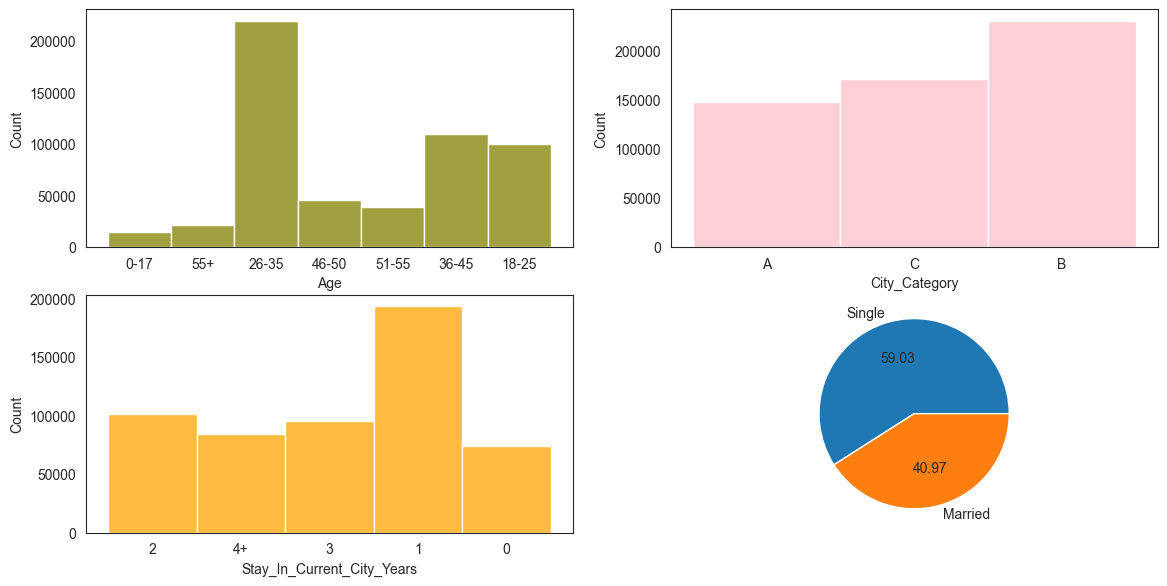

In [166]:
plt.figure(figsize=(20,8))
fig,axes=plt.subplots(3,2)
plt.subplot(2,2,1)
fig.subplots_adjust(top=1.2)
fig.subplots_adjust(right=1.2)
ax = sns.histplot(df['Age'],bins=20,color='olive')
plt.subplot(2,2,2)
fig.subplots_adjust(right=1.8)
ax = sns.histplot(df['City_Category'],color='pink')
plt.subplot(2,2,3)
ax = sns.histplot(df['Stay_In_Current_City_Years'],bins=10,color='orange')
plt.subplot(2,2,4)
ax = plt.pie(df['Marital_Status'].value_counts(),labels=['Single','Married'],autopct="%.2f")
plt.show()


#Most of the users are Male
#Most of the users are between the age category 26-35
#More users belong to B City_Category
#More users are Single as compare to Married




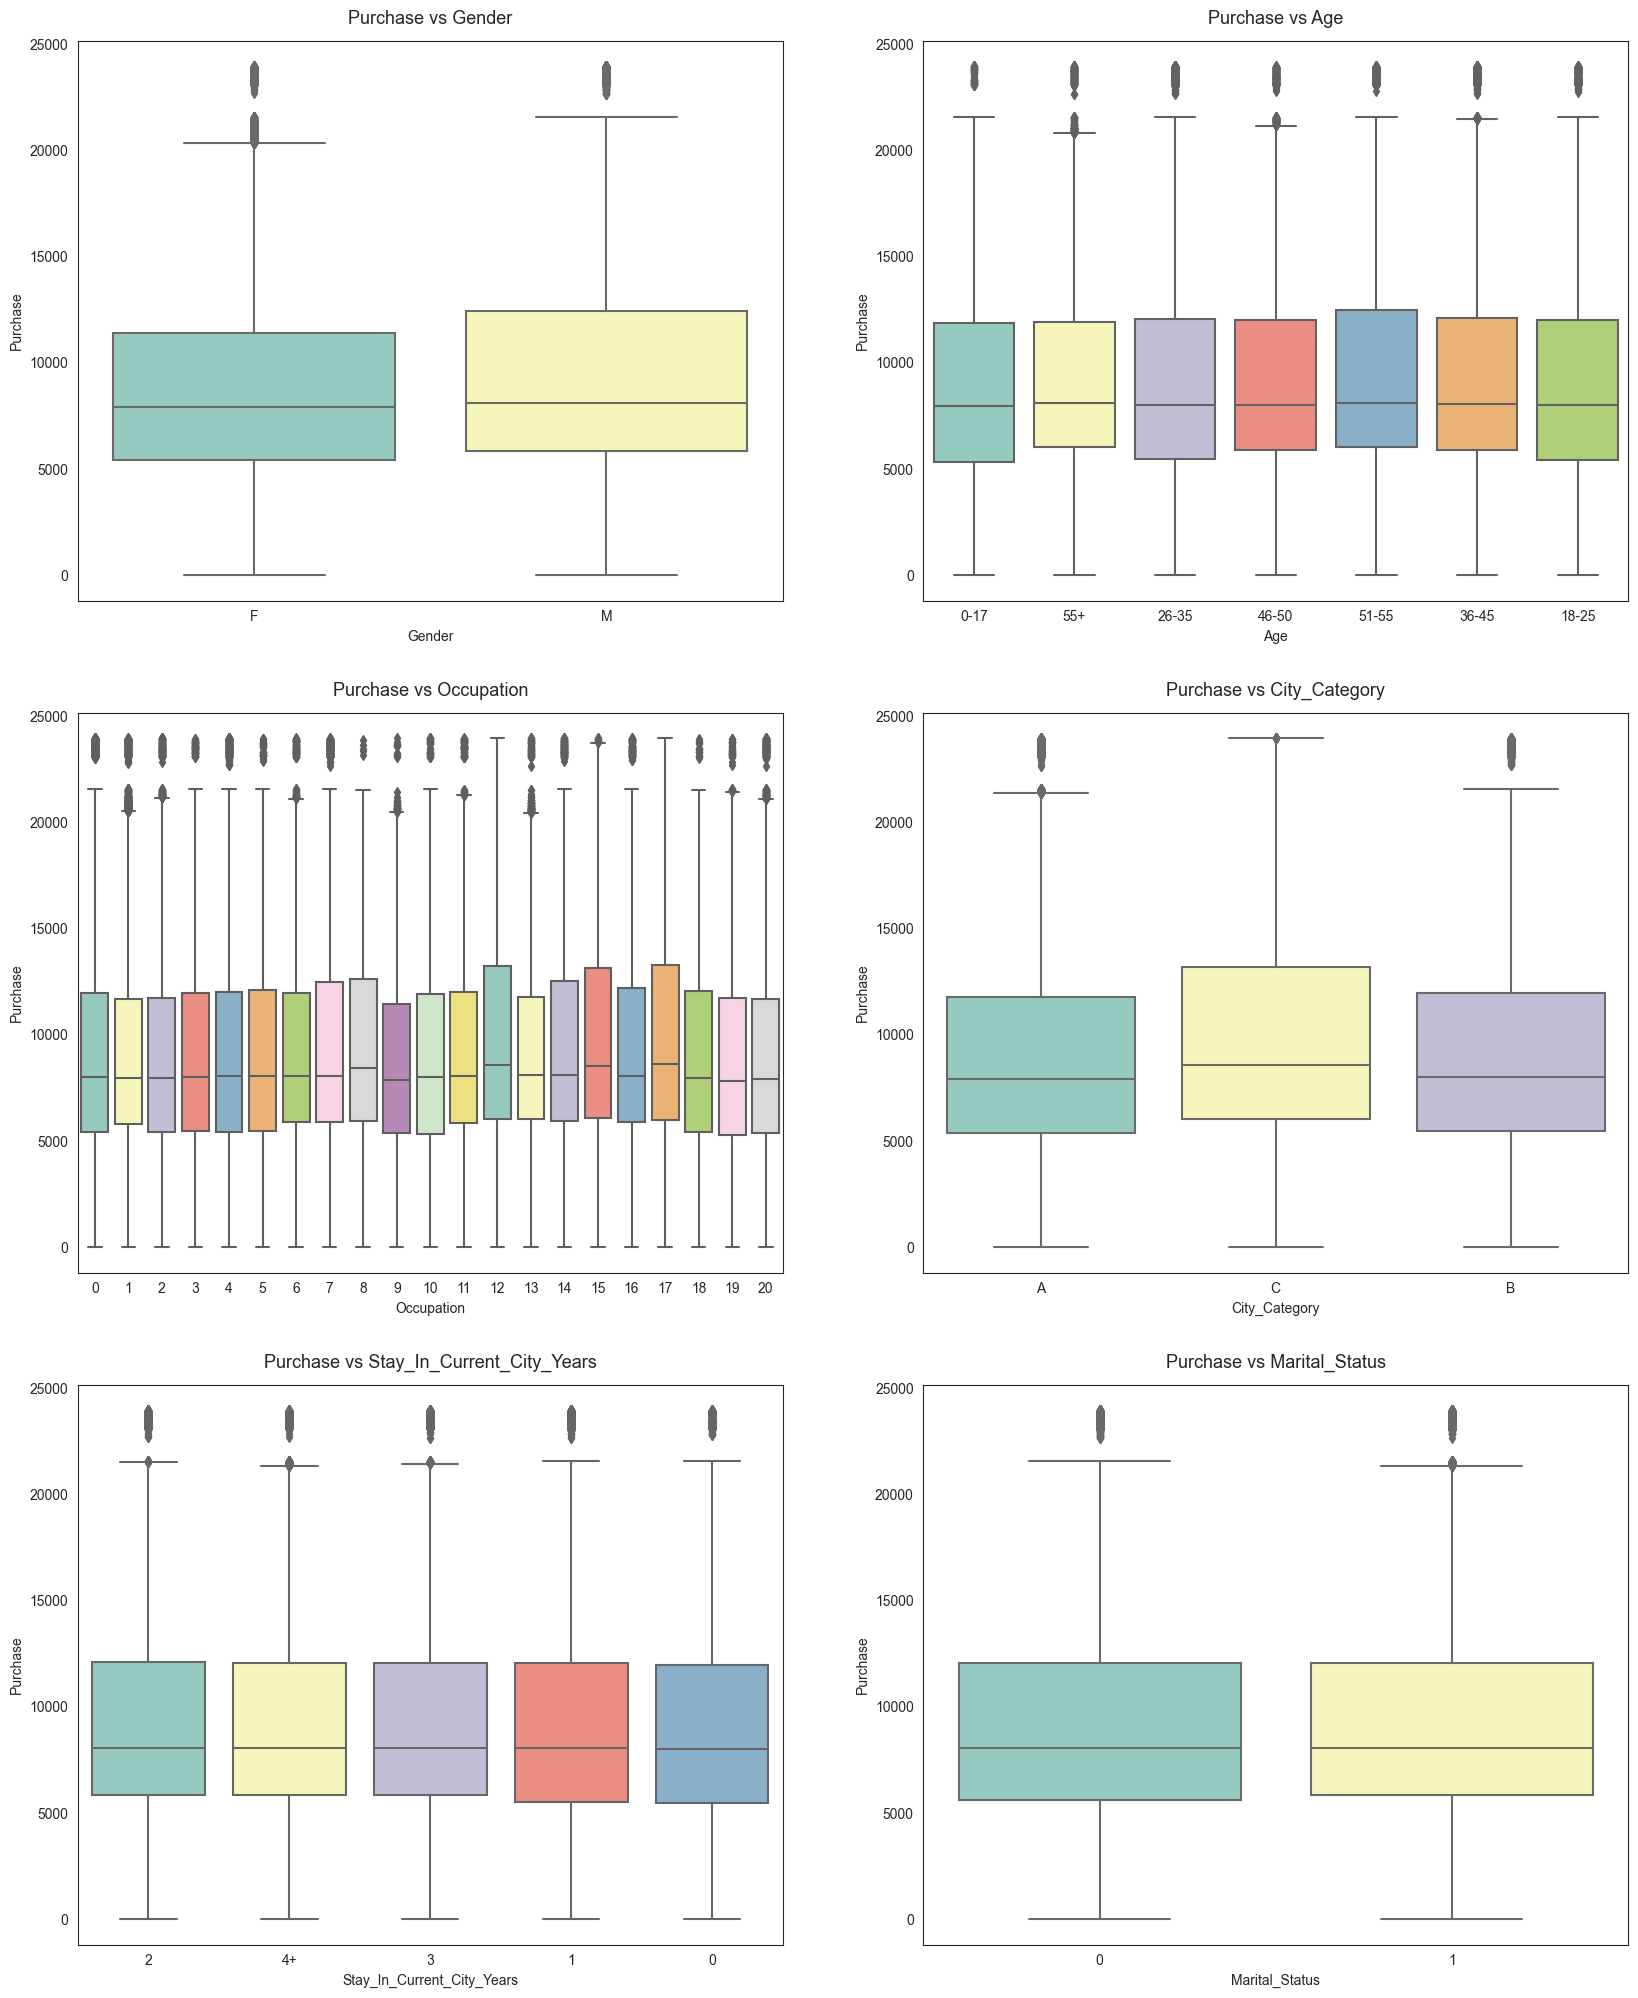

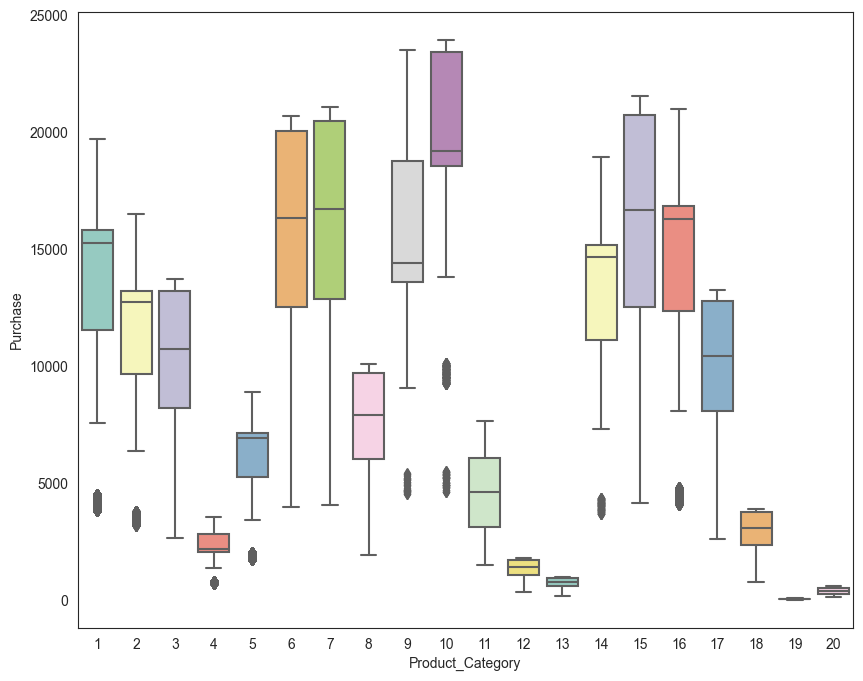

In [167]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

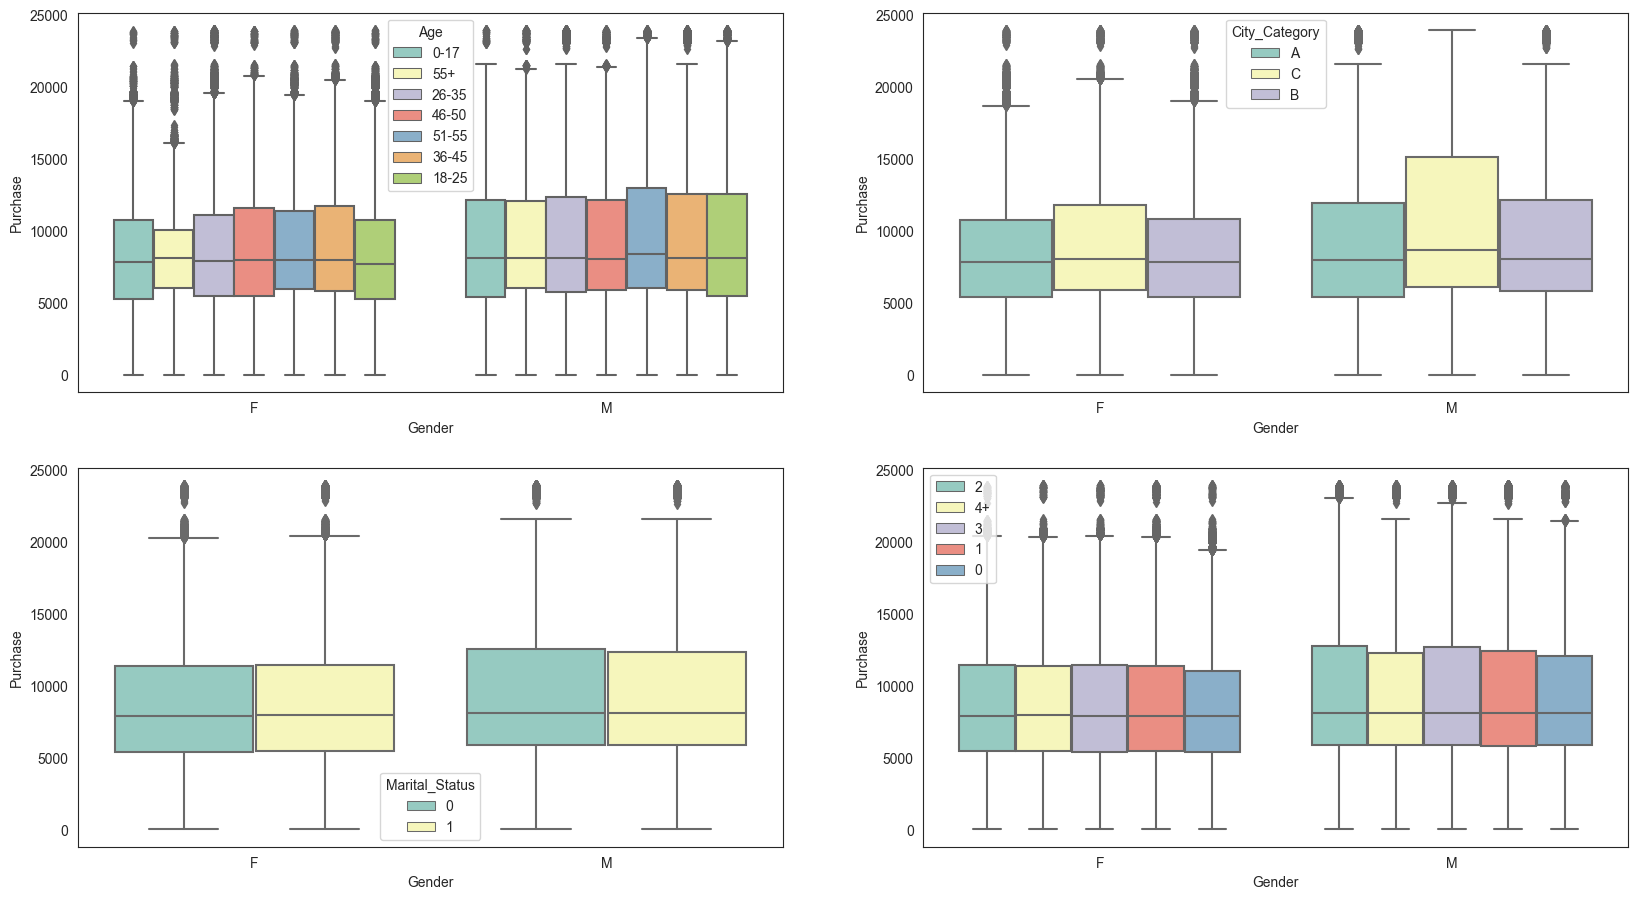

In [168]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [169]:
df.loc[:,'Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [170]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


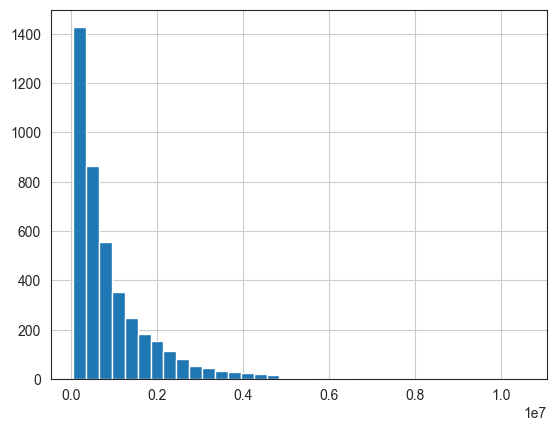

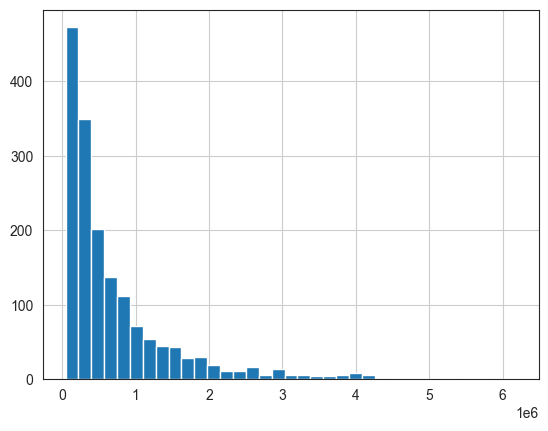

In [171]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [172]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


#On an Average Male spends a lot more than female

In [173]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [174]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)
